# Ehrlich - Corpus Analyses


## Occurrence

### Zeitschrift für Rechtssoziologie

#### Table of socio-legal classics occurrences in the ZfRsoz (Title metadata from crossref.org, absolute frequency)

In [1]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, print_occurences
corpus = create_cached_corpus("zfrsoz")
search_terms = [r'Bourdieu',r'Durkheim', r'Ehrlich',r'Foucault', r'Habermas',r'Luhmann','Marx','Teubner', 'Weber']
search_terms.reverse()
data = prepare_data(corpus, regex_list=search_terms, column='title')
print_occurences(data, search_terms)

Weber: 1992(1), 1997(1), 2013(4), 2019(1)
Teubner: 2015(2)
Marx: 
Luhmann: 1998(1), 2000(3), 2008(2)
Habermas: 
Foucault: 
Ehrlich: 2013(2)
Durkheim: 
Bourdieu: 2018(1), 2020(1)


#### Scatterplot socio-legal classics (ZfRsoz-Korpus, relative frequency)

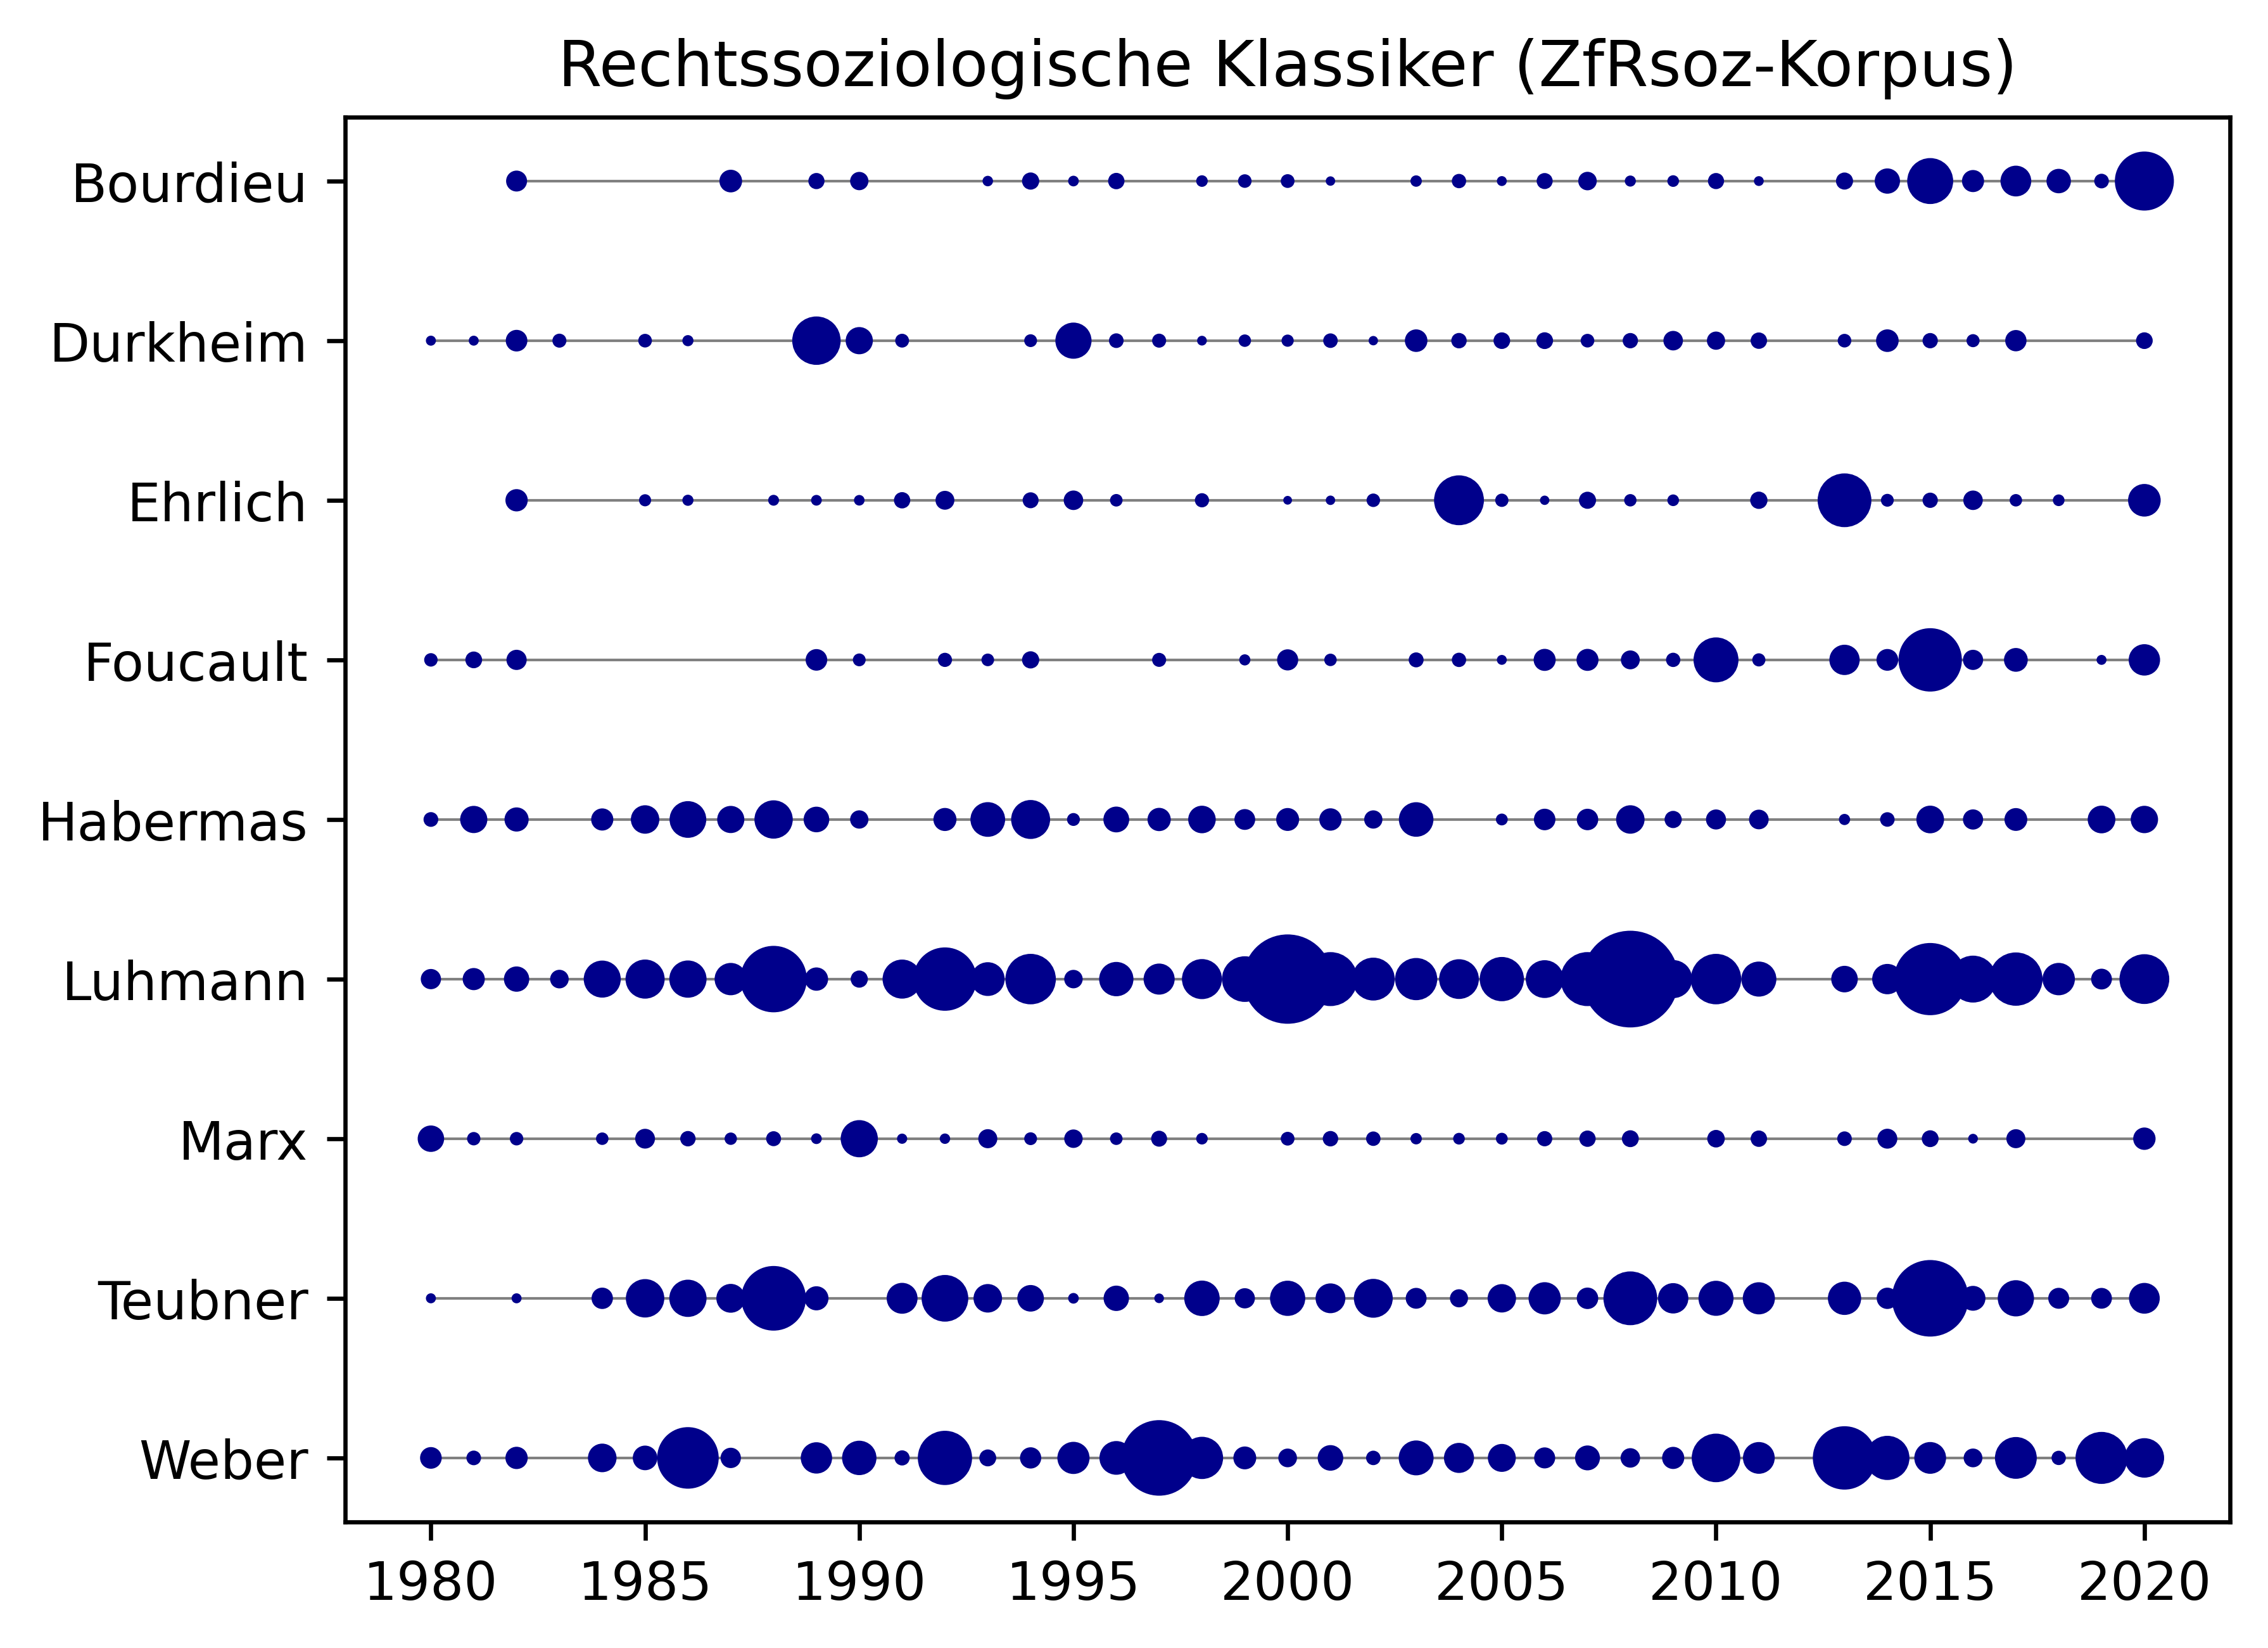

In [2]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("zfrsoz")
search_terms = [r'Bourdieu',r'Durkheim', r'Ehrlich',r'Foucault', r'Habermas',r'Luhmann','Marx','Teubner', 'Weber']
search_terms.reverse()
plot_by_year(prepare_data(corpus, search_terms),
             title="Rechtssoziologische Klassiker (ZfRsoz-Korpus)",
             dpi=600, file="figure/zfrsoz-socio-legal-classics-ts.png")


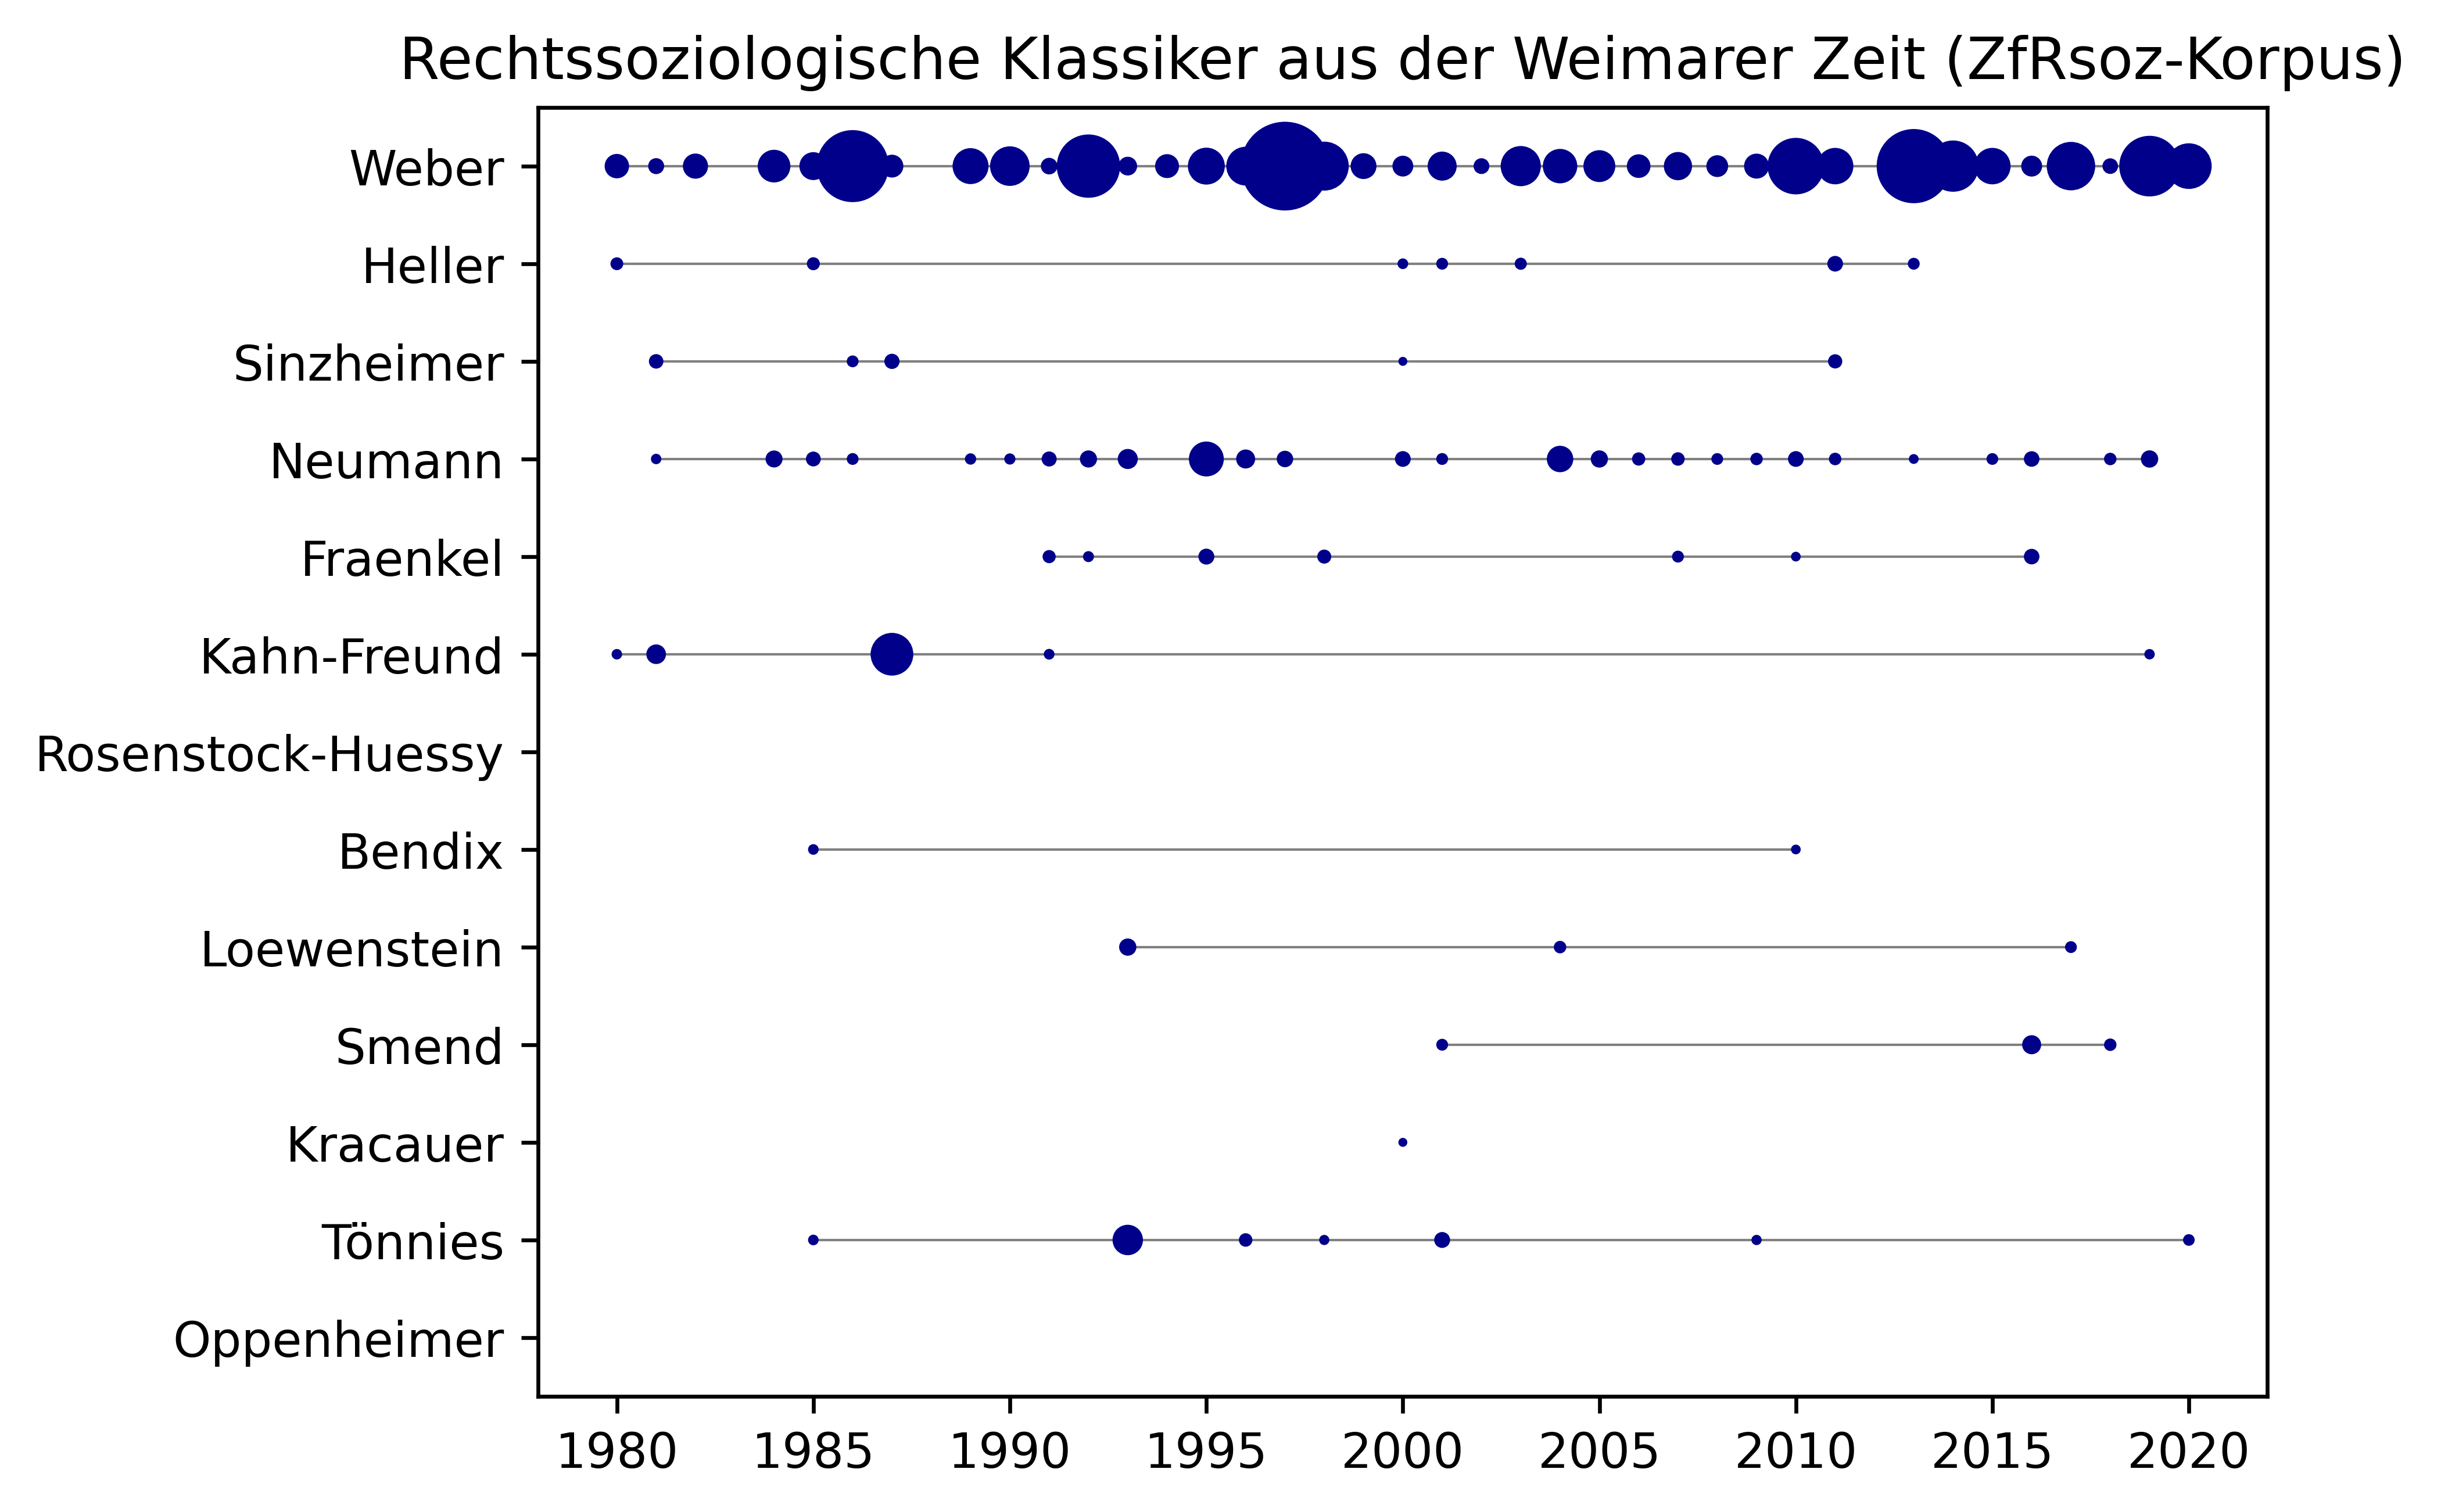

In [2]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("zfrsoz")
search_terms = ['Weber', 'Heller',r'Sinzheimer', 'Neumann', r'Fraenkel',r'Kahn-Freund', r'Rosenstock-Huessy',r'Bendix',
                'Loewenstein','Smend', 'Kracauer', 'Tönnies', 'Oppenheimer']
search_terms.reverse()
plot_by_year(prepare_data(corpus, search_terms),
             title="Rechtssoziologische Klassiker aus der Weimarer Zeit (ZfRsoz-Korpus)",
             dpi=600, file="docs/zfrsoz-socio-legal-classics-weimar-ts.png")

#### Bar chart occurrence "Ehrlich" / "Lebendes Recht" (ZfRsoz-Korpus)

Analyzing article corpus:   0%|          | 0/725 [00:00<?, ?it/s]

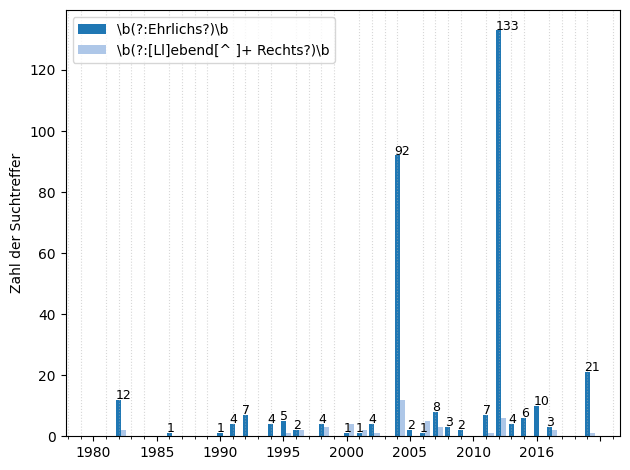

In [3]:
from scripts.utils import create_corpus, get_corpus_dir
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'\b(?:Ehrlichs?)\b', r'\b(?:[Ll]ebend[^ ]+ Rechts?)\b']
corpus = create_corpus(get_corpus_dir('FULLTEXTS/ZFRSOZ/zfrsoz-txt'))
corpus = corpus.loc[corpus['author'] != 'Smaus'] # manual correction of false positive
save_occurrences(corpus, regex_list, "data/zfrsoz-articles-occurrences.xlsx")
plt = plot_occurrences(corpus, regex_list, y_label='Zahl der Suchtreffer')
plt.savefig('figure/zfrsoz-tf-ehrlich', dpi=300, bbox_inches='tight')
plt.show()

### Journal of Law and Society

#### Table of socio-legal classics occurrences in the JLS (Title metadata from crossref.org, absolute frequency)

In [ ]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, print_occurences
corpus = create_cached_corpus("jls")
search_terms = [r'Bourdieu',r'Durkheim', r'Ehrlich',r'Foucault', r'Habermas',r'Luhmann','Marx','Teubner', 'Weber']
search_terms.reverse()
data = prepare_data(corpus, regex_list=search_terms, column='title')
print_occurences(data, search_terms)


#### Scatterplot socio-legal classics

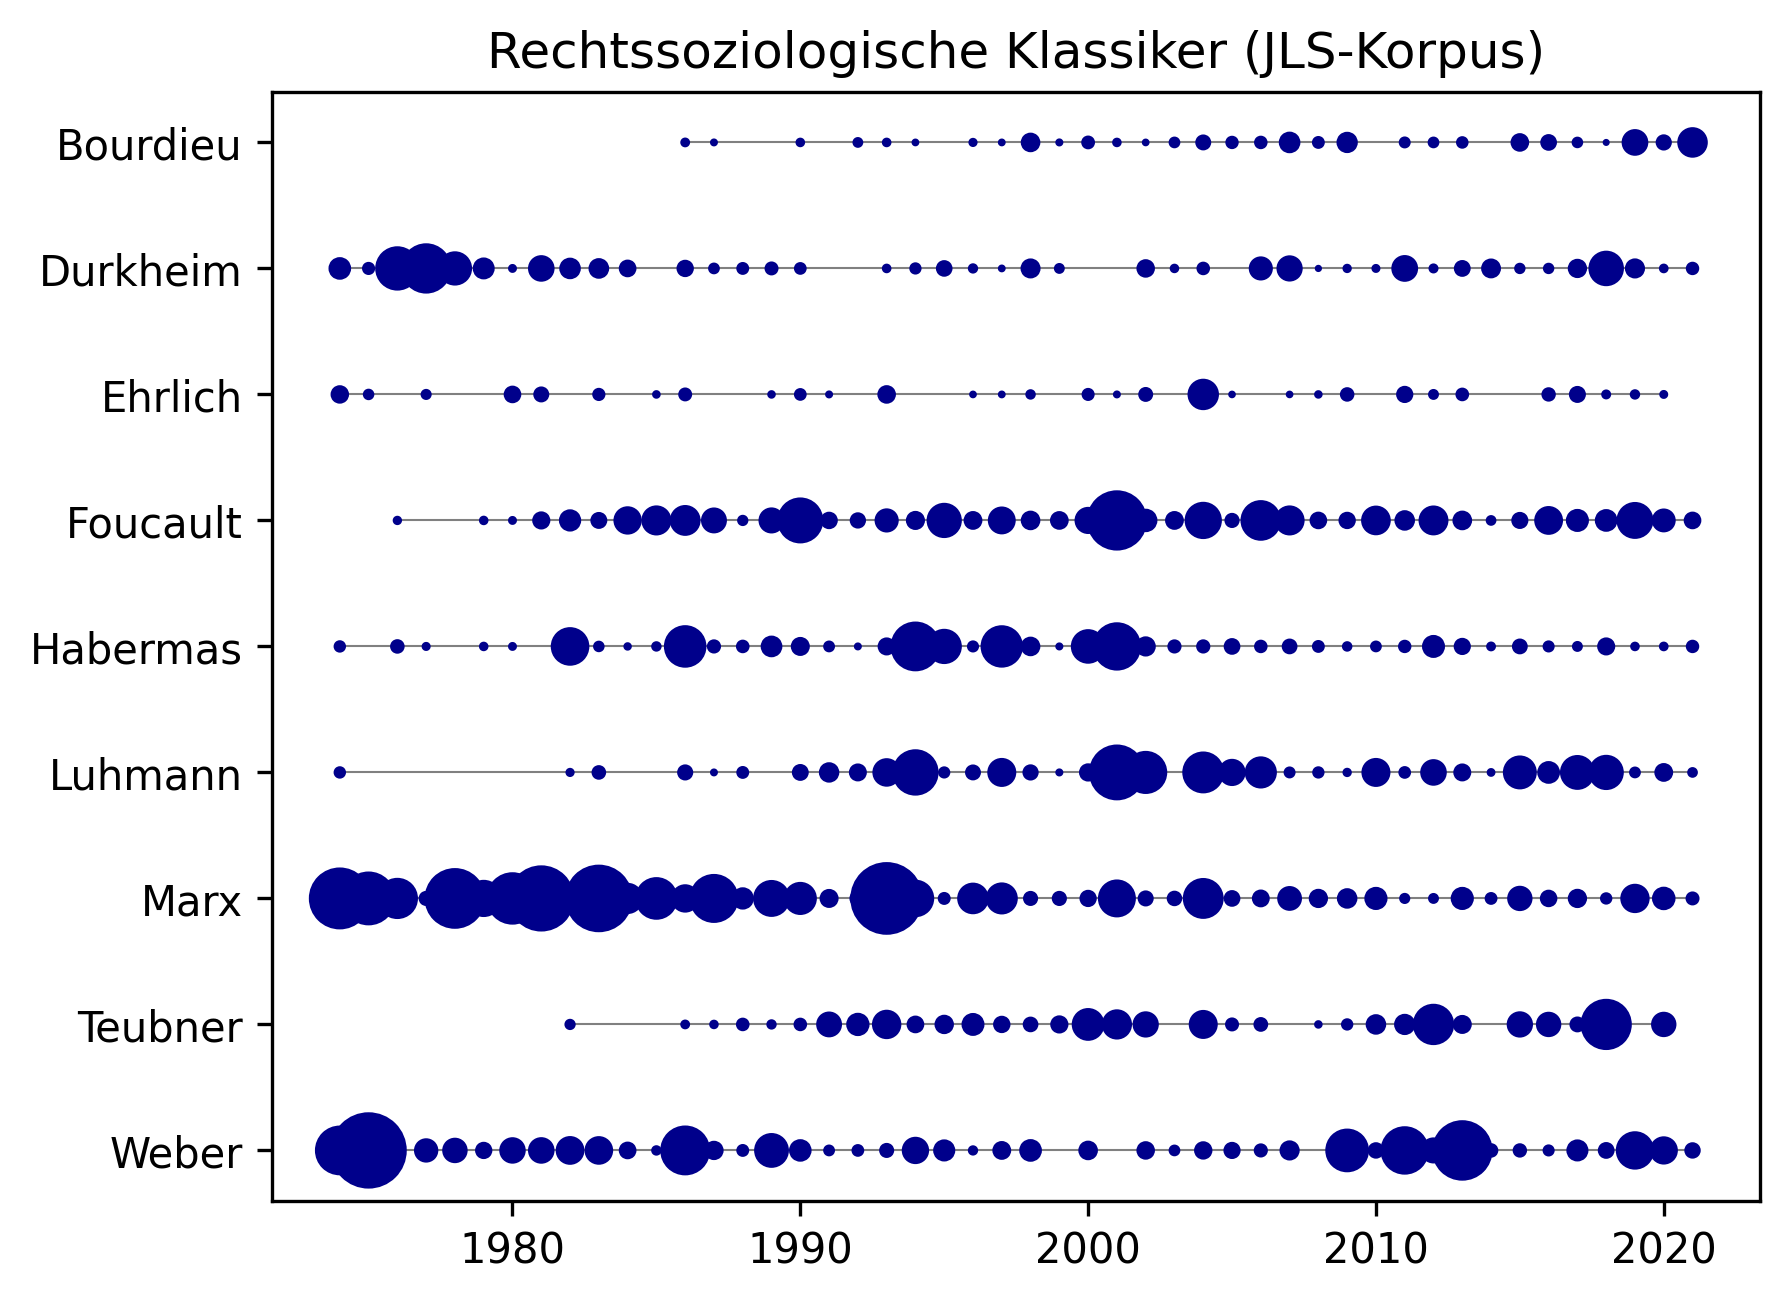

In [2]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("jls")
search_terms = [r'Bourdieu',r'Durkheim', r'Ehrlich',r'Foucault', r'Habermas',r'Luhmann','Marx','Teubner', 'Weber']
search_terms.reverse()
data = prepare_data(corpus, regex_list=search_terms)
plot_by_year(data,
             title="Rechtssoziologische Klassiker (JLS-Korpus)",
             dpi=300,
             file="figure/jls-socio-legal-classics-ts.png")


#### Bar chart occurrence "Ehrlich" / "Living Law"

In [ ]:
from scripts.utils import create_corpus, get_corpus_dir, DOICache
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'\b(?:Ehrlich)\b', r'\b(?:[Ll]iving [Ll]aw)\b']
doi_cache = DOICache("data/jls-doi-to-year.csv")
corpus = create_corpus(get_corpus_dir('FULLTEXTS/JLS/jls-txt'))
corpus = corpus.loc[corpus['author'] != 'Veljanovski'] # manual correction of false positive
corpus = corpus.loc[corpus['author'] != 'Ogus'] # manual correction of false positive
corpus['author'] = corpus['author'].replace("Tamanha","Tamanaha") # error in DOI metadata
save_occurrences(corpus, regex_list, "data/jls-articles-occurrences.xlsx")
plt = plot_occurrences(corpus, regex_list, y_label='Zahl der Suchtreffer')
plt.savefig('figure/jls-tf-ehrlich', dpi=300, bbox_inches='tight')
plt.show()

### Lehrbücher

In [ ]:

from scripts.occurrence_within_work import plot_occurrences, create_corpus
regex_list = [r'\bEhrlichs?\b', r'\b[Ll]ebend[^ ]+ Rechts?\b']
corpus = create_corpus("CORPORA/rsoz-lehrbuecher")
plt1 = plot_occurrences(corpus, regex_list,
                        x_label="Normalisierte Textposition",
                        y_label="Lehrbuch (sortiert nach Publikationsjahr)",
                        barchart_label="Anzahl der Vorkommen")
plt1.savefig('docs/11-rsoz-lehrbuecher-ehrlich.png', dpi=600, bbox_inches='tight')
plt1.show()

## Co-occurrence

### Lehrbücher

Compute co-occurences

In [ ]:
from dotenv import load_dotenv; load_dotenv()
from scripts.utils import create_corpus
from scripts.cooccurrence import find_cooccurring_words, filter_df
import os, re
regex = r'\bEhrlichs?\b'
corpus_dir = os.getenv('CORPUS_BASE_DIR') + "/CORPORA/rsoz-lehrbuecher"
df = filter_df(create_corpus(corpus_dir), regex)
cooccurring_words, global_cooccurring_words = find_cooccurring_words(
    df, regex,
    default_language='german',
    ignore=r'Eugen|[Vv]gl|\bff\b|Rechts?|\b.{1,2}\b|Aufl\w*|\bsei\b|Anm\w*|Abschnitt|[Mm]uss\w*|[Aa]\. ?a. ?o\.')
# cache results
import pickle
with open("cache/df.pickle", "wb") as file:
    pickle.dump(df, file)
with open("cache/cooccurring_words.pickle", "wb") as file:
    pickle.dump(cooccurring_words, file)
with open("cache/global_cooccurring_words.pickle", "wb") as file:
    pickle.dump(global_cooccurring_words, file)

print("Done.")

Resume here to plot a heatmap of the cached data


KeyboardInterrupt



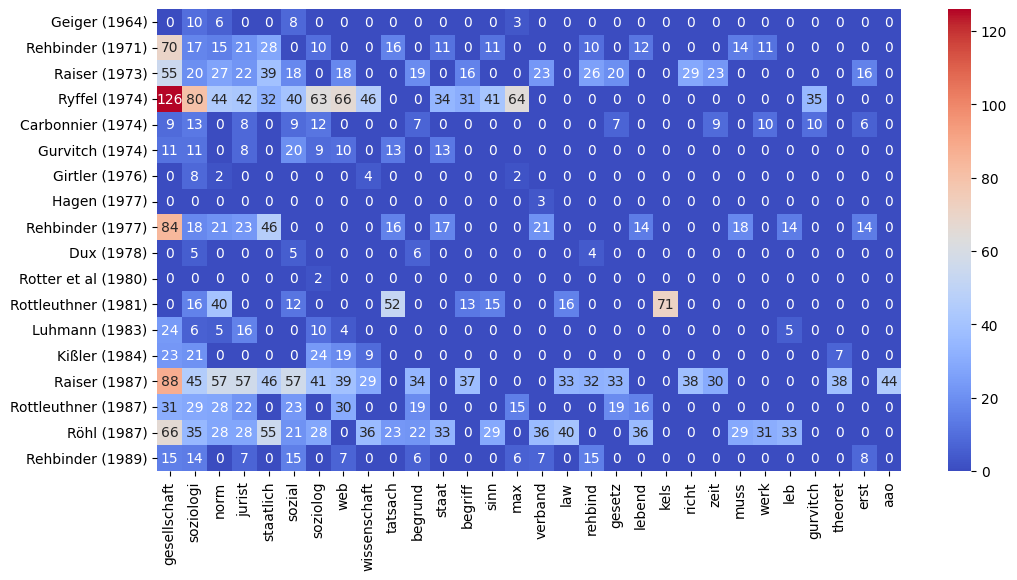

In [4]:
import pickle
with open("cache/df.pickle", "rb") as file:
    df = pickle.load(file)
with open("cache/cooccurring_words.pickle", "rb") as file:
    cooccurring_words = pickle.load(file)
with open("cache/global_cooccurring_words.pickle", "rb") as file:
    global_cooccurring_words = pickle.load(file)
from scripts.cooccurrence import filter_counters, create_heatmap
filtered_counters = filter_counters(cooccurring_words, global_cooccurring_words,max_doc=20, max_global=300)
create_heatmap(df, filtered_counters, max_words=30, file="docs/16-rsoz-lehrbuecher-ehrlich-co-occurrence.png")

### JLS

Analyzing article corpus:   0%|          | 0/1650 [00:00<?, ?it/s]

Tokenizing and stemming...:   0%|          | 0/11 [00:00<?, ?it/s]

Analyzing co-occurring words...:   0%|          | 0/11 [00:00<?, ?it/s]

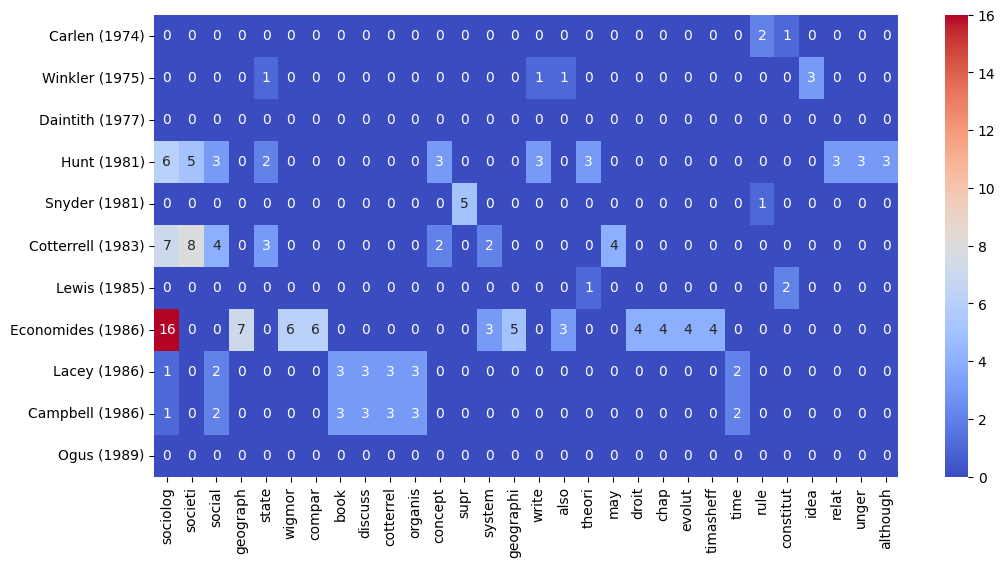

In [2]:
from dotenv import load_dotenv; load_dotenv()
from scripts.utils import create_corpus
from scripts.cooccurrence import find_cooccurring_words, filter_df,  filter_counters, create_heatmap
import os
regex = r'\bEhrlich?\b'
corpus_dir = os.getenv('CORPUS_BASE_DIR') + '/FULLTEXTS/JLS/jls-txt'
df = filter_df(create_corpus(corpus_dir), regex)
df = df.loc[df['year'] < 1990]
df = df.loc[df['author'] != 'Veljanovski'] # cites another Ehrlich
cooccurring_words, global_cooccurring_words = find_cooccurring_words(
    df, regex, default_language='english',
    ignore=r'Eugen|\b.{1,2}\b|[Ll]aw|[Ll]egal|[Ss]ee|[Rr]ev|ptl|han|and|[eE]ds')
filtered_counters = filter_counters(cooccurring_words, global_cooccurring_words,max_doc=20, max_global=300)
create_heatmap(df, filtered_counters, max_words=30)

Analyzing article corpus:   0%|          | 0/725 [00:00<?, ?it/s]

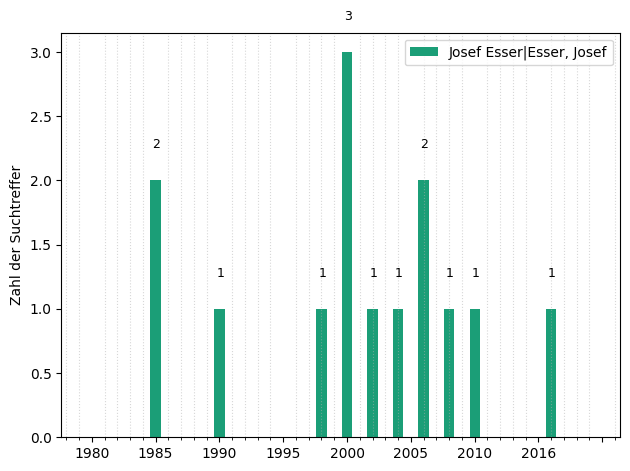

In [4]:
from scripts.utils import create_corpus, get_corpus_dir
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'Josef Esser|Esser, Josef']
corpus = create_corpus(get_corpus_dir('FULLTEXTS/ZFRSOZ/zfrsoz-txt'))
plt = plot_occurrences(corpus, regex_list, y_label='Zahl der Suchtreffer')
plt.show()